<a href="https://colab.research.google.com/github/MuthiahAinun/Proyek_Analisis_Sentimen/blob/main/Proyek_Analisis_Sentimen_Tsamarah_Muthi'ah_A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📚Proyek Analisis Sentimen: [Youtube-Comments-dataset]
- **Nama:** [Tsamarah Muthi'ah Abdullah]
- **Email:** [a135xaf486@devacademy.id]
- **ID Dicoding:** [a135xaf48]

# **Import Library**

In [2]:
# Import Library
import pandas as pd
import time
import random
import re
import string
import tensorflow as tf
import numpy as np
import nltk
from tensorflow import keras
from nltk.sentiment import SentimentIntensityAnalyzer
from transformers import pipeline
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Conv1D, GlobalMaxPooling1D, Bidirectional, BatchNormalization
from sklearn.metrics import classification_report, accuracy_score
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, GRU, Conv1D, GlobalMaxPooling1D, Dense, Dropout, Bidirectional, BatchNormalization
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE

In [2]:
!pip install imbalanced-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 238.4/238.4 kB 5.6 MB/s eta 0:00:00


# **1. Data Preprocessing**

In [ ]:
# Membaca dan Menampilkan informasi dataset
dataset = pd.read_csv("NDsO1LT_0lw_youtube_comments.csv")
print("Jumlah data:", len(dataset))

Jumlah data: 85028


In [ ]:
print(dataset.head())

             username                                               text  \
0            @MrBeast  BEAST GAMES FINALE DROPS FEBRUARY 13TH! GO WAT...   
1     @SultanRayyan-7                          Saya orang Indonesia 🇮🇩🇮🇩   
2  @MohamadrezaRezayy  مستر بیست عزیز ❤ لطفا دوبله فارسی این ویدیو را...   
3       @ILoveyou-954  বাংলাদেশ আসবেন কবে পাবনা জেলার কিছু দেখতে চাই ...   
4     @Moneymakerarab  This is for girls listen to Dalida - Helwa ya ...   

   likes          published_at  
0  54600  2025-02-08T16:59:31Z  
1      0  2025-03-19T21:51:42Z  
2      0  2025-03-19T21:43:03Z  
3      0  2025-03-19T21:34:32Z  
4      0  2025-03-19T21:20:21Z  


In [ ]:
print("Informasi Dataset:")
print(dataset.info())

Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85028 entries, 0 to 85027
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   username      84982 non-null  object
 1   text          85028 non-null  object
 2   likes         85028 non-null  int64 
 3   published_at  85028 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.6+ MB
None


In [ ]:
print('\nStatistik Deskriptif:')
print(dataset.describe())


Statistik Deskriptif:
               likes
count   85028.000000
mean        9.727654
std       744.702565
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max    167348.000000


In [ ]:
# Mengecek jumlah missing values di setiap kolom
print(dataset.isnull().sum())

username        46
text             0
likes            0
published_at     0
dtype: int64


In [ ]:
# Cek apakah ada baris duplikat
duplikat = dataset.duplicated()
print(duplikat)  # Menampilkan True untuk baris yang duplikat

# Hitung jumlah baris duplikat
print("Jumlah duplikasi berdasarkan username & text:", dataset.duplicated(subset=['username', 'text']).sum())

0        False
1        False
2        False
3        False
4        False
         ...  
85023    False
85024    False
85025    False
85026    False
85027    False
Length: 85028, dtype: bool
Jumlah duplikasi berdasarkan username & text: 1284


In [ ]:
# Menghapus duplikasi
dataset.drop_duplicates(subset=['text'], inplace=True)

In [ ]:
# Cek kembali apakah ada baris duplikat
duplikat = dataset.duplicated()
print(duplikat)  # Menampilkan True untuk baris yang duplikat

# Hitung jumlah baris duplikat
print("Jumlah duplikasi berdasarkan username & text:", dataset.duplicated(subset=['username', 'text']).sum())

0        False
1        False
2        False
3        False
4        False
         ...  
85016    False
85020    False
85021    False
85023    False
85026    False
Length: 68601, dtype: bool
Jumlah duplikasi berdasarkan username & text: 0


In [ ]:
# Fungsi pembersihan teks (hanya huruf alfabet, tanpa emoji & simbol)
def clean_text(text):
    if pd.isna(text):  # Tangani NaN
        return ""
    text = text.lower()  # Ubah ke huruf kecil
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Hanya simpan huruf dan spasi
    text = re.sub(r'\s+', ' ', text).strip()  # Hapus spasi berlebih
    return text

# Terapkan hanya pada kolom 'text'
dataset['cleaned_text'] = dataset['text'].astype(str).apply(clean_text)

# Tampilkan hasil
print("Data setelah pembersihan:")
print(dataset[['text', 'cleaned_text']].head())  # Menampilkan teks asli & teks bersih


Data setelah pembersihan:
                                                text  \
0  BEAST GAMES FINALE DROPS FEBRUARY 13TH! GO WAT...   
1                          Saya orang Indonesia 🇮🇩🇮🇩   
2  مستر بیست عزیز ❤ لطفا دوبله فارسی این ویدیو را...   
3  বাংলাদেশ আসবেন কবে পাবনা জেলার কিছু দেখতে চাই ...   
4  This is for girls listen to Dalida - Helwa ya ...   

                                        cleaned_text  
0  beast games finale drops february th go watch ...  
1                               saya orang indonesia  
2                                                     
3                                                     
4  this is for girls listen to dalida helwa ya ba...  


In [ ]:
print("Jumlah data Setelah Pembersihan:", len(dataset))

Jumlah data Setelah Pembersihan: 68601


## **2. Pelabelan Data**

**VADER Sentiment Analysis** untuk teks berbahasa Inggris.

**IndoBERT (Hugging Face Transformer)** untuk teks berbahasa Indonesia.

In [ ]:
# Memastikan NLTK VADER sudah diunduh
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [ ]:
# Gunakan model IndoBERT jika teks dalam bahasa Indonesia
sentiment_model = pipeline("sentiment-analysis", model="indobenchmark/indobert-base-p2")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


pytorch_model.bin:   0%|          | 0.00/498M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at indobenchmark/indobert-base-p2 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


model.safetensors:   0%|          | 0.00/498M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/229k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

Device set to use cpu


In [ ]:
# Inisialisasi VADER untuk bahasa Inggris
sia = SentimentIntensityAnalyzer()

In [ ]:
# Fungsi untuk menentukan sentimen menggunakan VADER (untuk teks bahasa Inggris)
def get_sentiment_vader(text):
    sentiment_score = sia.polarity_scores(text)['compound']
    if sentiment_score >= 0.05:
        return "positif"
    elif sentiment_score <= -0.05:
        return "negatif"
    else:
        return "netral"

In [ ]:
# Fungsi untuk menentukan sentimen menggunakan IndoBERT (untuk teks bahasa Indonesia)
def get_sentiment_bert(text):
    result = sentiment_model(text)
    return result[0]['label'].lower()  # Output: "positif", "negatif", "netral"

In [ ]:
# Fungsi utama untuk menentukan sentimen (otomatis memilih metode berdasarkan bahasa)
def classify_sentiment(text):
    if re.search(r'[a-zA-Z]', text):  # Jika mengandung huruf Inggris, gunakan VADER
        return get_sentiment_vader(text)
    else:  # Jika tidak, kemungkinan bahasa Indonesia → Gunakan IndoBERT
        return get_sentiment_bert(text)

In [ ]:
# Terapkan fungsi pada dataset
dataset['sentiment'] = dataset['cleaned_text'].apply(classify_sentiment)

In [ ]:
# Tampilkan hasil
print(dataset[['cleaned_text', 'sentiment']].head())

                                        cleaned_text sentiment
0  beast games finale drops february th go watch ...    netral
1                               saya orang indonesia    netral
4  this is for girls listen to dalida helwa ya ba...   positif
5                                          trk varmi    netral
7                                                wow   positif


In [ ]:
import pickle

# Simpan dataset yang sudah diberi label
with open("dataset_labeled.pkl", "wb") as f:
    pickle.dump(dataset, f)

print("Dataset dengan label sentimen sudah disimpan.")

Dataset dengan label sentimen sudah disimpan.


sentiment
netral     34599
positif    14033
negatif     3336
Name: count, dtype: int64


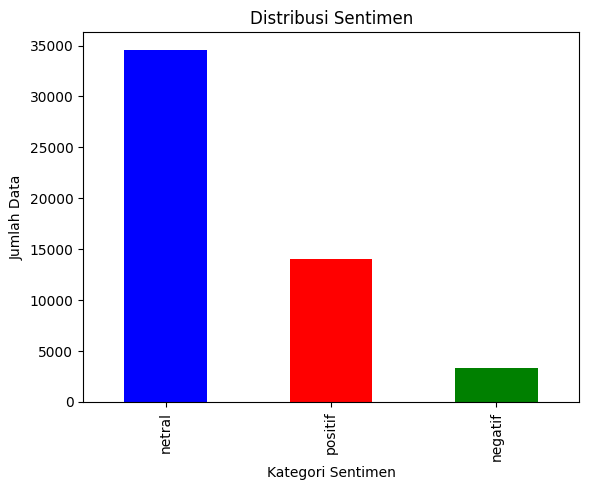

In [ ]:
import matplotlib.pyplot as plt# Cek distribusi sentimen
print(dataset['sentiment'].value_counts())

# Visualisasi distribusi
# Menggunakan .value_counts() untuk melihat distribusi label sentimen:
dataset['sentiment'].value_counts().plot(kind='bar', color=['blue', 'red', 'green'])
plt.xlabel("Kategori Sentimen")
plt.ylabel("Jumlah Data")
plt.title("Distribusi Sentimen")
plt.show()

💡 Grafik menunjukkan jumlah yang tidak seimbang (terlalu banyak sentimen netral dibanding negatif dan positif), maka perlu dilakukan penyesuaian untuk menyeimbangkan data dengan menggunakan Teknik Oversampling-SMOTE.

**SMOTE**
(Synthetic Minority Over-sampling Technique) untuk data tidak seimbang. SMOTE mensintesis data baru untuk kelas minoritas agar lebih seimbang

In [2]:
import pickle

# Muat dataset yang sudah diberi label
with open("dataset_labeled.pkl", "rb") as f:
    dataset_loaded = pickle.load(f)

# Tampilkan contoh data untuk memastikan semuanya tersimpan dengan benar
print(dataset_loaded.head())  # Jika dataset dalam bentuk DataFrame

          username                                               text  likes  \
0         @MrBeast  BEAST GAMES FINALE DROPS FEBRUARY 13TH! GO WAT...  54600   
1  @SultanRayyan-7                          Saya orang Indonesia 🇮🇩🇮🇩      0   
4  @Moneymakerarab  This is for girls listen to Dalida - Helwa ya ...      0   
5    @emirhanavsar                                         TÜRK VARMI      0   
7     @s.s.ali5577                                                Wow      0   

           published_at                                       cleaned_text  \
0  2025-02-08T16:59:31Z  beast games finale drops february th go watch ...   
1  2025-03-19T21:51:42Z                               saya orang indonesia   
4  2025-03-19T21:20:21Z  this is for girls listen to dalida helwa ya ba...   
5  2025-03-19T21:02:54Z                                          trk varmi   
7  2025-03-19T20:42:20Z                                                wow   

  sentiment  
0    netral  
1    netral  
4   posi

# **3. Pembangunan Model**

## `📌 Skema 1: RF + Word2Vec (80/20)`

In [3]:
# Load dataset dan label
with open("dataset_labeled.pkl", "rb") as f:
    dataset_rf_w2v = pickle.load(f)

In [4]:
# Label Encoding untuk sentimen
le_rf_w2v = LabelEncoder()
y_encoded_rf_w2v = le_rf_w2v.fit_transform(dataset_rf_w2v['sentiment'])

In [5]:
# Split data menjadi train dan test (80/20)
X_train_rf_w2v, X_test_rf_w2v, y_train_rf_w2v, y_test_rf_w2v = train_test_split(
    dataset_rf_w2v['cleaned_text'], y_encoded_rf_w2v, test_size=0.2, random_state=42
)

In [6]:
from gensim.models import Word2Vec
# Vectorisasi teks menggunakan Word2Vec
model_w2v = Word2Vec(sentences=[text.split() for text in X_train_rf_w2v], vector_size=100, window=5, min_count=1, workers=4)
model_w2v.save("word2vec_rf.model")

In [7]:
# Fungsi untuk vectorize text
def vectorize_text_rf_w2v(text, model_w2v):
    words = text.split()
    word_vectors = [model_w2v.wv[word] for word in words if word in model_w2v.wv]
    return np.mean(word_vectors, axis=0) if word_vectors else np.zeros(100)

In [8]:
# Terapkan SMOTE untuk menyeimbangkan data
X_train_vec_rf_w2v = np.array([vectorize_text_rf_w2v(text, model_w2v) for text in X_train_rf_w2v])
smote_rf_w2v = SMOTE(random_state=42)
X_resampled_rf_w2v, y_resampled_rf_w2v = smote_rf_w2v.fit_resample(X_train_vec_rf_w2v, y_train_rf_w2v)

In [9]:
from collections import Counter
# Lihat distribusi kelas sebelum dan setelah SMOTE
print("Distribusi kelas sebelum SMOTE:")
print(Counter(y_train_rf_w2v))

Distribusi kelas sebelum SMOTE:
Counter({1: 27732, 2: 11191, 0: 2651})


In [10]:
print("\nDistribusi kelas setelah SMOTE:")
print(Counter(y_resampled_rf_w2v))


Distribusi kelas setelah SMOTE:
Counter({0: 27732, 2: 27732, 1: 27732})


Distribusi data setiap kelas setelah SMOTE menjadi seimbang

In [11]:
from sklearn.ensemble import RandomForestClassifier
# Inisialisasi Random Forest
rf_model = RandomForestClassifier(random_state=42)

Hyperparameter Tuning dengan RandomizedSearchCV: Mencari hyperparameter terbaik untuk model Random Forest.

In [12]:
from sklearn.model_selection import RandomizedSearchCV
# Define hyperparameters to tune
param_dist = {
    'n_estimators': [100, 200, 300, 400],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

In [13]:
# RandomizedSearchCV to find the best parameters
random_search = RandomizedSearchCV(rf_model, param_distributions=param_dist, n_iter=20, cv=3, n_jobs=-1, verbose=2, random_state=42)

**RandomizedSearchCV digunakan untuk mencari kombinasi terbaik dari hyperparameters yang didefinisikan dalam param_dist.**

- n_iter= 50 berarti mengambil 50 kombinasi acak dari hyperparameter.

- cv=3 menggunakan 3-fold cross-validation untuk evaluasi model.

- n_jobs=-1 menggunakan semua CPU yang tersedia untuk mempercepat proses pencarian.

- best_params_ memberi tahu kombinasi hyperparameter yang menghasilkan akurasi terbaik.

In [14]:
# Fit the model
random_search.fit(X_resampled_rf_w2v, y_resampled_rf_w2v)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


/usr/local/lib/python3.11/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [None, 10, 20, 30],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300, 400]},
                   random_state=42, verbose=2)

In [15]:
# Best model
best_rf_model = random_search.best_estimator_

In [16]:
# Prediksi pada data test
X_test_vec_rf_w2v = np.array([vectorize_text_rf_w2v(text, model_w2v) for text in X_test_rf_w2v])
y_pred_rf_w2v = best_rf_model.predict(X_test_vec_rf_w2v)

In [17]:
# Evaluasi hasil
print(f"Accuracy pada test set: {accuracy_score(y_test_rf_w2v, y_pred_rf_w2v)}")

Accuracy pada test set: 0.8436598037329228


In [25]:
# Fungsi untuk melakukan prediksi dengan model Random Forest
def predict_rf_w2v(text):
    text_vec = vectorize_text_rf_w2v(text, model_w2v).reshape(1, -1)  # Vectorisasi input text
    prediction = best_rf_model.predict(text_vec)  # Prediksi menggunakan model RF
    return le_rf_w2v.inverse_transform(prediction)[0]  # Konversi kembali ke label asli

In [26]:
# Contoh input dan prediksi
input_text_rf_w2v = "The video was so good."
prediksi_rf_w2v = predict_rf_w2v(input_text_rf_w2v)
print(f"Prediksi untuk '{input_text_rf_w2v}': {prediksi_rf_w2v}")

Prediksi untuk 'The video was so good.': positif


## **Insight:**

## `📌 Skema 2: CNN + Word2Vec (80/20)`

Ambil Data dan Tokenisasi

In [27]:
# Load dataset dari file CSV / Pickle
data = pd.read_pickle("dataset_labeled.pkl")

In [28]:
# Ambil teks yang sudah dibersihkan
texts = data["cleaned_text"].astype(str).tolist()
labels = data["sentiment"].tolist()

In [ ]:
import shutil
import nltk
from nltk.tokenize import word_tokenize

nltk.download()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?


In [38]:
import os
print(os.listdir('/content/nltk_data/tokenizers'))


['punkt', 'punkt.zip']


In [40]:
# Tokenisasi teks
tokenized_texts = [word_tokenize(text.lower()) for text in texts]

LookupError: 
**********************************************************************
  Resource [93mpunkt_tab[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt_tab')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt_tab/english/[0m

  Searched in:
    - '/root/nltk_data'
    - '/usr/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
    - '/content/nltk_data'
    - '/content/nltk_data'
    - '/root/nltk_data'
    - '/root/nltk_data'
    - '/content/nltk_data'
    - '/root/nltk_data'
    - '/usr/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/local/lib/nltk_data'
    - '/content/nltk_data'
**********************************************************************


Word2Vec Embedding

In [ ]:
import gensim
from gensim.models import Word2Vec

# Latih model Word2Vec
word2vec_model = Word2Vec(sentences=tokenized_texts, vector_size=100, window=5, min_count=1, workers=4)

# Konversi setiap teks menjadi vektor rata-rata
def text_to_vector(tokens, model):
    vectors = [model.wv[word] for word in tokens if word in model.wv]
    return np.mean(vectors, axis=0) if vectors else np.zeros(100)

vectorized_texts = np.array([text_to_vector(tokens, word2vec_model) for tokens in tokenized_texts])

Encoding Label (One-Hot Encoding)

In [17]:
from tensorflow.keras.utils import to_categorical
# Bersihkan whitespaces di kolom sentiment
data["sentiment"] = data["sentiment"].str.strip()

# Mapping label ke angka
label_mapping = {"netral": 0, "positif": 1, "negatif": 2}

# Konversi label ke angka
labels = [label_mapping[label] for label in data["sentiment"]]

print("Label berhasil dikonversi:", labels[:10])  # Cek beberapa hasil pertama

Label berhasil dikonversi: [0, 0, 1, 0, 1, 0, 0, 0, 0, 0]


In [20]:
# Konversi ke one-hot encoding
encoded_labels = to_categorical(labels, num_classes=3)

# Konversi ke DataFrame agar lebih mudah dibaca
one_hot_df = pd.DataFrame(encoded_labels, columns=["netral", "positif", "negatif"])

# Tampilkan hasil
print(one_hot_df.head())

   netral  positif  negatif
0     1.0      0.0      0.0
1     1.0      0.0      0.0
2     0.0      1.0      0.0
3     1.0      0.0      0.0
4     0.0      1.0      0.0


Penyeimbangan Data dengan SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
vectorized_texts_smote, labels_smote = smote.fit_resample(vectorized_texts, encoded_labels)

In [21]:
from collections import Counter

print("Distribusi sebelum SMOTE:", Counter(labels))

Distribusi sebelum SMOTE: Counter({0: 34599, 1: 14033, 2: 3336})


[nltk_data] Downloading package punkt to /content/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


KONVERSI TEKS KE TOKEN ID DAN PADDING

In [ ]:
max_length = 100  # Sesuaikan dengan panjang teks

tokenizer = Tokenizer()
tokenizer.word_index = word_index
sequences = tokenizer.texts_to_sequences(texts)
padded_sequences = pad_sequences(sequences, maxlen=max_length, padding="post")

SPLIT DATA

In [101]:
X_train, X_test, y_train, y_test = train_test_split(
    padded_sequences, labels, test_size=0.2, random_state=42
)

BANGUN MODEL CNN

In [107]:
import gensim
from gensim.models import FastText
model = Sequential([
    Embedding(input_dim=len(word_index) + 1, output_dim=embedding_dim,
              weights=[embedding_matrix], input_length=max_length, trainable=False),
    Conv1D(128, 5, activation="relu"),
    GlobalMaxPooling1D(),
    Dense(64, activation="relu"),
    Dropout(0.5),
    Dense(num_classes, activation="softmax")
])

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])


In [108]:
print("Shape of embedding_matrix:", embedding_matrix.shape)

Shape of embedding_matrix: (5000, 100)


In [109]:
# Ubah X menjadi representasi FastText (rata-rata embedding per kata)
X_fasttext = np.zeros((len(X_padded), EMBEDDING_DIM))

for i, seq in enumerate(X_padded):
    word_embeddings = [fasttext_model.wv[tokenizer.index_word.get(word, "")] for word in seq if word in tokenizer.index_word]

    if word_embeddings:
        X_fasttext[i] = np.mean(word_embeddings, axis=0)
    else:
        X_fasttext[i] = np.zeros(EMBEDDING_DIM)  # Jika tidak ada embedding, isi dengan nol

In [110]:
# Ubah label menjadi angka (contoh: positif=1, negatif=0, netral=2)
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(labels)

In [111]:
# Terapkan SMOTE untuk menangani ketidakseimbangan kelas
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_fasttext, y_encoded)

In [112]:
print("Sebelum SMOTE:", Counter(y_encoded))
print("Setelah SMOTE:", Counter(y_resampled))

Sebelum SMOTE: Counter({1: 34599, 2: 14033, 0: 3336})
Setelah SMOTE: Counter({1: 34599, 2: 34599, 0: 34599})


In [119]:
# Reshape untuk CNN (samples, timesteps, features)
SEQUENCE_LENGTH = 100
EMBEDDING_DIM = fasttext_model.vector_size  # Ukuran vektor FastText
X_resampled_cnn = X_resampled.reshape(X_resampled.shape[0], SEQUENCE_LENGTH, EMBEDDING_DIM)

ValueError: cannot reshape array of size 10379700 into shape (103797,100,100)

In [79]:
# Bangun model CNN
model_cnn_ft = Sequential()

In [80]:
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Embedding, Dropout, BatchNormalization, GlobalAveragePooling1D
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
# Convolutional Layers
# Convolutional Block 1
model_cnn_ft.add(Conv1D(filters=128, kernel_size=5, activation='relu', padding='same', input_shape=(100, 1)))
model_cnn_ft.add(BatchNormalization())
model_cnn_ft.add(MaxPooling1D(pool_size=2))

# Convolutional Block 2
model_cnn_ft.add(Conv1D(filters=128, kernel_size=5, activation='relu', padding='same'))
model_cnn_ft.add(BatchNormalization())
model_cnn_ft.add(MaxPooling1D(pool_size=2))

# Convolutional Block 3
model_cnn_ft.add(Conv1D(filters=64, kernel_size=3, activation='relu', padding='same'))
model_cnn_ft.add(BatchNormalization())
model_cnn_ft.add(MaxPooling1D(pool_size=2))

# Convolutional Block 4
model_cnn_ft.add(Conv1D(filters=64, kernel_size=3, activation='relu', padding='same'))
model_cnn_ft.add(BatchNormalization())
model_cnn_ft.add(MaxPooling1D(pool_size=2))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [81]:
# Global Average Pooling (menghindari overfitting)
model_cnn_ft.add(GlobalAveragePooling1D())

In [82]:
# Fully Connected Layers
model_cnn_ft.add(Dense(128, activation='relu'))
model_cnn_ft.add(Dropout(0.4))  # Dropout lebih tinggi untuk regularisasi
model_cnn_ft.add(Dense(64, activation='relu'))
model_cnn_ft.add(Dropout(0.4))
model_cnn_ft.add(Dense(3, activation='softmax'))  # 3 kelas

In [83]:
# Compile model
model_cnn_ft.compile(optimizer=Adam(learning_rate=0.001),
                      loss='sparse_categorical_crossentropy',
                      metrics=['accuracy'])

In [84]:
# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)

In [87]:
# Konversi ke NumPy array jika masih berbentuk Pandas Series
X_test_cnn_ft = np.array(X_test_cnn_ft)  # atau gunakan X_test_cnn_ft.to_numpy()
X_resampled_cnn_ft = np.array(X_resampled_cnn_ft)

# Reshape agar sesuai dengan input model
X_resampled_cnn_ft = X_resampled_cnn_ft.reshape((X_resampled_cnn_ft.shape[0], X_resampled_cnn_ft.shape[1], 1))
X_test_cnn_ft = X_test_cnn_ft.reshape((X_test_cnn_ft.shape[0], X_test_cnn_ft.shape[1], 1))

IndexError: tuple index out of range

In [88]:
print(X_test_cnn_ft.shape)


(10394,)


In [90]:
print(X_resampled_cnn_ft.shape[1])  # Seharusnya 100

100


In [89]:
print(X_resampled_cnn_ft.shape)  # Harusnya (batch_size, sequence_length, feature_dim)


(83196, 100, 1)


In [93]:
# Konversi ke NumPy array jika masih berbentuk Pandas Series
X_test_cnn_ft = np.array(X_test_cnn_ft)

# Pastikan jumlah fitur per sampel adalah 100 (harus bisa dibagi 100)
num_features = 100
num_samples = X_test_cnn_ft.shape[0] // num_features  # Cari jumlah sampel

# Reshape hanya jika jumlah total elemen bisa dibagi 100
if X_test_cnn_ft.shape[0] % num_features == 0:
    X_test_cnn_ft = X_test_cnn_ft.reshape(num_samples, num_features, 1)
else:
    print("⚠️ Jumlah fitur tidak sesuai! Pastikan setiap sampel memiliki 100 fitur.")

⚠️ Jumlah fitur tidak sesuai! Pastikan setiap sampel memiliki 100 fitur.


In [94]:
print(X_test_cnn_ft[:5])  # Cek beberapa elemen pertama
print(len(X_test_cnn_ft))  # Total elemen


['brbr brbr br br br br br br br br br br br br br br br br br'
 'its pretty coolwe had so much time to build and perfect stuff today we get hours to do as much to build a house'
 'magnificent' 'anything to pay the bills egypt' 'trk varm']
10394


In [77]:
# Training model
history = model_cnn_ft.fit(X_resampled_cnn_ft, y_resampled_cnn_ft,
                            validation_split=0.2,
                            epochs=50,
                            batch_size=32,
                            callbacks=[early_stopping, reduce_lr])

Epoch 1/50


ValueError: Input 0 of layer "conv1d_14" is incompatible with the layer: expected min_ndim=3, found ndim=2. Full shape received: (None, 3)

In [38]:
# Evaluasi Model
loss, accuracy = model_cnn_ft.evaluate(X_test_cnn_ft, y_test_cnn_ft)

325/325 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step


In [39]:
# Evaluasi hasil
print(f"Accuracy pada test set: {accuracy:.4f}")

Accuracy pada test set: 0.679526649990379


In [ ]:
# Inference untuk input baru
def predict_cnn_ft(text):
    text_vec = vectorize_with_fasttext_cnn(text, model_fasttext).reshape(1, -1)
    prediction = model_cnn_ft.predict(text_vec)
    return le_cnn_ft.inverse_transform(np.argmax(prediction, axis=1))[0]

In [ ]:
# Contoh input dan prediksi
input_text_cnn_ft = "ini sangat bagus"
prediksi_cnn_ft = predict_cnn_ft(input_text_cnn_ft)
print(f"Prediksi untuk '{input_text_cnn_ft}': {prediksi_cnn_ft}")

In [ ]:
# Memastikan hanya menggunakan fitur numerik (bukan teks asli)
X = np.array(padded_sequences)  # Teks yang sudah ditokenisasi
y = dataset['sentiment_encoded']  # Label yang sudah diencode